In [1]:
#Importing libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#laodding the datasets
df = pd.read_csv("bhp.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13196,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [3]:
#Finding the misisng values
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [4]:
#Finding duplicates values
df.duplicated().sum()

881

In [5]:
#Handling duplicates values
df.drop_duplicates(inplace=True)

In [6]:
#Finding duplicates values
df.duplicated().sum()

0

# Removing outlier using Percentile

In [7]:
df["price_per_sqft"].describe()

count    1.231900e+04
mean     8.115050e+03
std      1.104734e+05
min      2.678298e+02
25%      4.307692e+03
50%      5.500000e+03
75%      7.452904e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [8]:
min_treshold , max_threshold = df["price_per_sqft"].quantile([0.005,0.995])
min_treshold , max_threshold

(2337.960784313725, 28529.285714285703)

In [9]:
df[df["price_per_sqft"]<min_treshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
130,Electronic City,2 BHK,880.0,1.0,16.50,2,1875.000000
361,Chandapura,1 BHK,530.0,1.0,11.66,1,2200.000000
509,Banashankari Stage III,4 Bedroom,8500.0,4.0,145.00,4,1705.882353
665,Yelahanka,3 BHK,35000.0,3.0,130.00,3,371.428571
757,Sarjapur,5 Bedroom,4360.0,4.0,90.00,5,2064.220183
...,...,...,...,...,...,...,...
11635,Begur,3 BHK,2400.0,3.0,12.00,3,500.000000
11879,Electronic City,2 BHK,880.0,2.0,19.00,2,2159.090909
12355,Nagashetty Halli,4 BHK,16335.0,4.0,149.00,4,912.151821
12454,Bommasandra Industrial Area,2 BHK,7000.0,2.0,135.00,2,1928.571429


In [10]:
df[df["price_per_sqft"]>max_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
345,Suragajakkanahalli,3 Bedroom,11.0,3.0,74.0,3,672727.272727
760,Sector 3 HSR Layout,9 Bedroom,600.0,9.0,190.0,9,31666.666667
978,Rajaji Nagar,4 Bedroom,315.0,4.0,90.0,4,28571.428571
...,...,...,...,...,...,...,...
12678,Chikkalasandra,5 Bedroom,1000.0,4.0,300.0,5,30000.000000
12948,Defence Colony,10 Bedroom,7150.0,13.0,3600.0,10,50349.650350
13013,1st Block Koramangala,4 Bedroom,1200.0,5.0,350.0,4,29166.666667
13081,Defence Colony,6 Bedroom,8000.0,6.0,2800.0,6,35000.000000


In [11]:
outlier = df[(df["price_per_sqft"]<min_treshold) | (df["price_per_sqft"]>max_threshold)]
outlier

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.00,8,33333.333333
130,Electronic City,2 BHK,880.0,1.0,16.50,2,1875.000000
345,Suragajakkanahalli,3 Bedroom,11.0,3.0,74.00,3,672727.272727
361,Chandapura,1 BHK,530.0,1.0,11.66,1,2200.000000
...,...,...,...,...,...,...,...
12678,Chikkalasandra,5 Bedroom,1000.0,4.0,300.00,5,30000.000000
12948,Defence Colony,10 Bedroom,7150.0,13.0,3600.00,10,50349.650350
13013,1st Block Koramangala,4 Bedroom,1200.0,5.0,350.00,4,29166.666667
13081,Defence Colony,6 Bedroom,8000.0,6.0,2800.00,6,35000.000000


In [12]:
new_df = df[(df["price_per_sqft"]>min_treshold) & (df["price_per_sqft"]<max_threshold)]
new_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530.612245
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13196,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136


In [13]:
len(outlier)

124

# Removing outlier using 4 Standard Daviation after percentile

In [14]:
new_df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12195.000000,12195.000000,12195.000000,12195.000000,12195.000000
mean,1547.641567,2.710783,111.776076,2.816318,6679.646061
std,975.413601,1.352287,134.192222,1.306252,3838.312465
min,250.000000,1.000000,8.000000,1.000000,2341.176471
25%,1100.000000,2.000000,50.000000,2.000000,4326.115179
50%,1282.000000,2.000000,73.000000,3.000000,5500.000000
75%,1689.640000,3.000000,121.000000,3.000000,7415.081166
max,30400.000000,40.000000,2736.000000,43.000000,28500.000000


<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

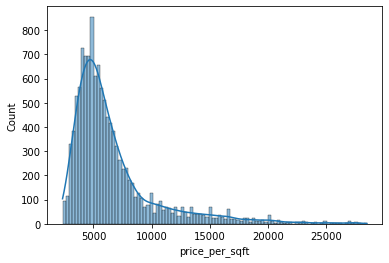

In [15]:
sns.histplot(new_df["price_per_sqft"],kde=True)

In [16]:
lower_bound = new_df.price_per_sqft.mean() - 4*new_df.price_per_sqft.std()
lower_bound

-8673.603798356042

In [17]:
upper_bound = new_df["price_per_sqft"].mean() + 4*new_df["price_per_sqft"].std()
upper_bound

22032.895920089566

In [18]:
new_df[new_df["price_per_sqft"]<lower_bound]

,location,size,total_sqft,bath,price,bhk,price_per_sqft


In [19]:
new_df[new_df["price_per_sqft"]>upper_bound]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
87,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083.333333
475,RMV 2nd Stage,4 BHK,1150.0,4.0,260.0,4,22608.695652
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719.165085
849,Indiranagar HAL 2nd Stage,4 Bedroom,2400.0,4.0,640.0,4,26666.666667
...,...,...,...,...,...,...,...
12900,HAL 2nd Stage,5 Bedroom,2040.0,4.0,500.0,5,24509.803922
13078,Ramakrishnappa Layout,4 Bedroom,9200.0,4.0,2600.0,4,28260.869565
13094,Rajarajeshwari nagar,4 Bedroom,1200.0,5.0,325.0,4,27083.333333
13127,5th Stage BEML Layout,4 Bedroom,1200.0,5.0,325.0,4,27083.333333


In [20]:
outlier2 = new_df[(new_df["price_per_sqft"]<lower_bound) | (new_df["price_per_sqft"]>upper_bound)]
outlier2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
87,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083.333333
475,RMV 2nd Stage,4 BHK,1150.0,4.0,260.0,4,22608.695652
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719.165085
849,Indiranagar HAL 2nd Stage,4 Bedroom,2400.0,4.0,640.0,4,26666.666667
...,...,...,...,...,...,...,...
12900,HAL 2nd Stage,5 Bedroom,2040.0,4.0,500.0,5,24509.803922
13078,Ramakrishnappa Layout,4 Bedroom,9200.0,4.0,2600.0,4,28260.869565
13094,Rajarajeshwari nagar,4 Bedroom,1200.0,5.0,325.0,4,27083.333333
13127,5th Stage BEML Layout,4 Bedroom,1200.0,5.0,325.0,4,27083.333333


In [21]:
len(outlier2)

105

In [22]:
df2 = new_df[(new_df["price_per_sqft"]>lower_bound) & (new_df["price_per_sqft"]<upper_bound)]
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530.612245
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13196,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
